<a href="https://colab.research.google.com/github/esraa1000/Jigsaw_Puzzle/blob/main/milestone1_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GitHub Connection**

In [33]:
!git clone https://github.com/esraa1000/Jigsaw_Puzzle


fatal: destination path 'Jigsaw_Puzzle' already exists and is not an empty directory.


In [34]:
!ls Jigsaw_Puzzle

dataset  dataset.zip  jigsaw_puzzle.ipynb  milestone1.ipynb  README.md


In [35]:
!ls Jigsaw_Puzzle/dataset

correct  puzzle_2x2  puzzle_4x4  puzzle_8x8


## **Preprare the Dataset**

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

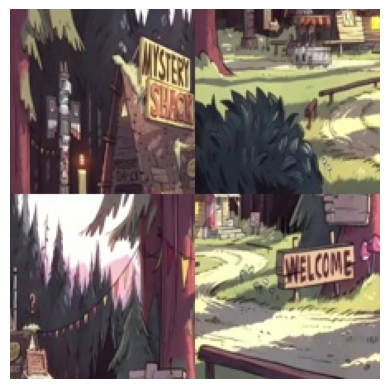

In [36]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/Jigsaw_Puzzle/dataset/puzzle_2x2/7.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")


In [37]:
import os

DATASET_PATH = "/content/Jigsaw_Puzzle/dataset"

path_2x2 = os.path.join(DATASET_PATH, "puzzle_2x2")
path_4x4 = os.path.join(DATASET_PATH, "puzzle_4x4")
path_8x8 = os.path.join(DATASET_PATH, "puzzle_8x8")

images_2x2 = [os.path.join(path_2x2, f) for f in os.listdir(path_2x2)]
images_4x4 = [os.path.join(path_4x4, f) for f in os.listdir(path_4x4)]
images_8x8 = [os.path.join(path_8x8, f) for f in os.listdir(path_8x8)]


In [38]:
print("2x2 images:", len(images_2x2))
print("4x4 images:", len(images_4x4))
print("8x8 images:", len(images_8x8))


2x2 images: 110
4x4 images: 110
8x8 images: 110


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

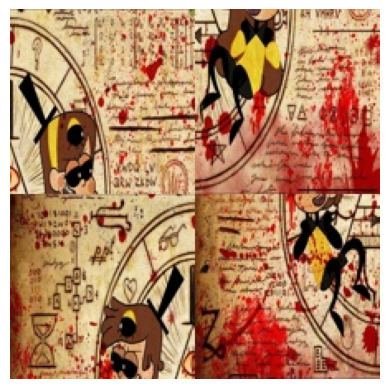

In [39]:
import cv2
import matplotlib.pyplot as plt

test_img = cv2.imread(images_2x2[0])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

plt.imshow(test_img)
plt.axis("off")


Store in Arrays

In [40]:
import cv2

grays_2x2 = []
grays_4x4 = []
grays_8x8 = []

def convert_to_gray(image_paths):
    gray_list = []
    for path in image_paths:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_list.append(gray)
    return gray_list

grays_2x2 = convert_to_gray(images_2x2)
grays_4x4 = convert_to_gray(images_4x4)
grays_8x8 = convert_to_gray(images_8x8)


Gray Scale

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

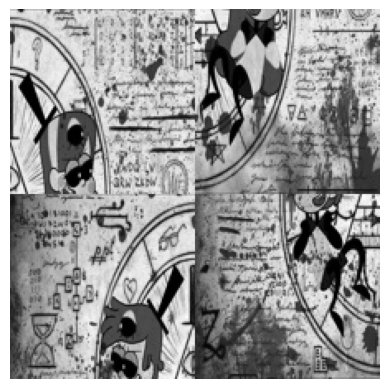

In [41]:
import matplotlib.pyplot as plt

plt.imshow(grays_2x2[0], cmap='gray')
plt.axis("off")


## **Noise Removal**
Guassian & Bilateral

In [42]:
def denoise_image(gray_img):
    # Gaussian blur (smooths noise but also smooths edges slightly)
    gaussian = cv2.GaussianBlur(gray_img, (5, 5), 0)

    # Bilateral filter (smooths noise but preserves edges)
    bilateral = cv2.bilateralFilter(gray_img, d=9, sigmaColor=75, sigmaSpace=75)

    return gaussian, bilateral


In [43]:
gaussian_2x2, bilateral_2x2 = [], []
gaussian_4x4, bilateral_4x4 = [], []
gaussian_8x8, bilateral_8x8 = [], []

def process_list(gray_list):
    g_list = []
    b_list = []
    for img in gray_list:
        g, b = denoise_image(img)
        g_list.append(g)
        b_list.append(b)
    return g_list, b_list


gaussian_2x2, bilateral_2x2 = process_list(grays_2x2)
gaussian_4x4, bilateral_4x4 = process_list(grays_4x4)
gaussian_8x8, bilateral_8x8 = process_list(grays_8x8)


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

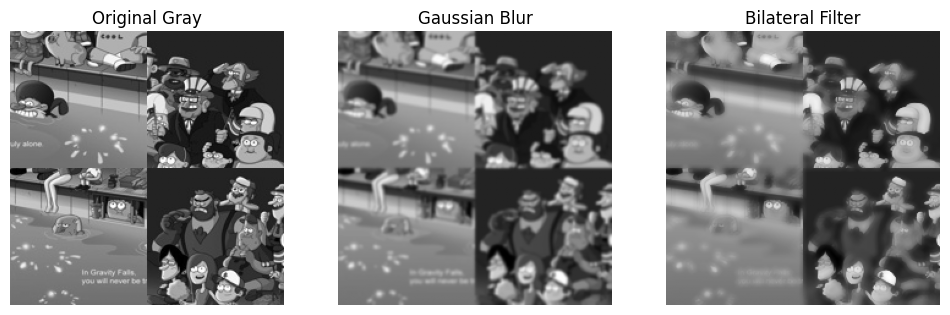

In [44]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original Gray")
plt.imshow(grays_2x2[2], cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Gaussian Blur")
plt.imshow(gaussian_2x2[2], cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Bilateral Filter")
plt.imshow(bilateral_2x2[2], cmap='gray')
plt.axis("off")


In [45]:
!pip install ipywidgets
from ipywidgets import interact, IntSlider
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [46]:
sample_img = grays_2x2[0]
#Add all the image arrays later

In [47]:
def interactive_denoise(gauss_k,
                        bilateral_d,
                        sigma_color,
                        sigma_space):

    # Gaussian (kernel must be odd)
    if gauss_k % 2 == 0:
        gauss_k += 1

    gaussian = cv2.GaussianBlur(sample_img, (gauss_k, gauss_k), 0)

    # Bilateral
    bilateral = cv2.bilateralFilter(sample_img,
                                    d=bilateral_d,
                                    sigmaColor=sigma_color,
                                    sigmaSpace=sigma_space)

    # Display results
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(sample_img, cmap='gray')
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.title(f"Gaussian (k={gauss_k})")
    plt.imshow(gaussian, cmap='gray')
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.title(f"Bilateral (d={bilateral_d})")
    plt.imshow(bilateral, cmap='gray')
    plt.axis("off")

    plt.show()


In [59]:
interact(
    interactive_denoise,
    gauss_k = IntSlider(value=5, min=1, max=25, step=2, description="Gaussian k"),
    bilateral_d = IntSlider(value=9, min=1, max=30, step=1, description="Bilateral d"),
    sigma_color = IntSlider(value=75, min=1, max=150, step=5, description="Sigma Color"),
    sigma_space = IntSlider(value=75, min=1, max=150, step=5, description="Sigma Space")
);


interactive(children=(IntSlider(value=5, description='Gaussian k', max=25, min=1, step=2), IntSlider(value=9, …

In [61]:
#Find the best parameters and apply it on the whole dataset
gaussian_img = cv2.GaussianBlur(sample_img, (5, 5), 0)


## **Contrast Enhancement**

In [82]:
from ipywidgets import interactive

# Define the interactive function (same as before)
def interactive_clahe_pipeline(clip_limit, tile_grid):
    img = gaussian_img.copy()
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_grid, tile_grid))
    enhanced = clahe.apply(gray)

    # Display
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Gaussian Input")
    plt.imshow(gray, cmap='gray')
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("CLAHE Output")
    plt.imshow(enhanced, cmap='gray')
    plt.axis("off")
    plt.show()

    return enhanced


In [84]:
from ipywidgets import interactive

# Create interactive object
clahe_widget = interactive(
    interactive_clahe_pipeline,
    clip_limit=IntSlider(value=2, min=1, max=20, step=1, description="Clip Limit"),
    tile_grid=IntSlider(value=8, min=2, max=32, step=2, description="Tile Grid Size")
)

# Display the widget
display(clahe_widget)


interactive(children=(IntSlider(value=2, description='Clip Limit', max=20, min=1), IntSlider(value=8, descript…

In [85]:

# After adjusting sliders to your preferred parameters, get the output
clahe_img = clahe_widget.result


## **Thresholding**

In [90]:
from ipywidgets import interactive, IntSlider, Dropdown

# Define function (same as before)
def interactive_threshold_pipeline(thresh_value, thresh_type):
    img = clahe_img.copy()  # input from CLAHE

    type_dict = {
        "Binary": cv2.THRESH_BINARY,
        "Binary Inv": cv2.THRESH_BINARY_INV,
        "Truncate": cv2.THRESH_TRUNC,
        "To Zero": cv2.THRESH_TOZERO,
        "To Zero Inv": cv2.THRESH_TOZERO_INV
    }

    ret, thresh_img = cv2.threshold(img, thresh_value, 255, type_dict[thresh_type])

    # Display input vs output
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("CLAHE Input")
    plt.imshow(img, cmap='gray')
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title(f"Threshold Output")
    plt.imshow(thresh_img, cmap='gray')
    plt.axis("off")
    plt.show()

    return thresh_img

# Use interactive instead of interact
threshold_widget = interactive(
    interactive_threshold_pipeline,
    thresh_value=IntSlider(value=128, min=0, max=255, step=1, description="Threshold"),
    thresh_type=Dropdown(
        options=["Binary", "Binary Inv", "Truncate", "To Zero", "To Zero Inv"],
        value="Binary",
        description="Type"
    )
)

# Display sliders
display(threshold_widget)


interactive(children=(IntSlider(value=128, description='Threshold', max=255), Dropdown(description='Type', opt…

In [91]:

# Assign the output after adjusting sliders
thresh_img_out = threshold_widget.result

## **Morphology**

In [99]:
from ipywidgets import interactive, IntSlider, Dropdown
import matplotlib.pyplot as plt
import cv2

def interactive_morph_pipeline(op_type, kernel_size):
    img = thresh_img_out.copy()  # input from thresholding

    if kernel_size % 2 == 0:
        kernel_size += 1
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

    op_dict = {
        "Erosion": cv2.MORPH_ERODE,
        "Dilation": cv2.MORPH_DILATE,
        "Opening": cv2.MORPH_OPEN,
        "Closing": cv2.MORPH_CLOSE,
        "Gradient": cv2.MORPH_GRADIENT
    }

    morph_img = cv2.morphologyEx(img, op_dict[op_type], kernel)

    # Display input vs output
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Threshold Input")
    plt.imshow(img, cmap='gray')
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title(f"Morphology Output")
    plt.imshow(morph_img, cmap='gray')
    plt.axis("off")
    plt.show()

    return morph_img

# Use interactive (not interact)
morph_widget = interactive(
    interactive_morph_pipeline,
    op_type=Dropdown(
        options=["Erosion", "Dilation", "Opening", "Closing", "Gradient"],
        value="Closing",
        description="Operation"
    ),
    kernel_size=IntSlider(value=3, min=1, max=15, step=2, description="Kernel Size")
)

# Display sliders
display(morph_widget)


interactive(children=(Dropdown(description='Operation', index=3, options=('Erosion', 'Dilation', 'Opening', 'C…

In [100]:
# Assign the output after adjusting sliders
morph_img_out = morph_widget.result


## **Find Edges**

In [101]:
def interactive_edges_pipeline(low_thresh, high_thresh):
    img = morph_img_out.copy()  # input from morphology

    edges = cv2.Canny(img, low_thresh, high_thresh)

    plt.figure(figsize=(10,5))
    plt.title("Edges from Morphology Output")
    plt.imshow(edges, cmap='gray')
    plt.axis("off")
    plt.show()

    return edges

# Use interactive
edges_widget = interactive(
    interactive_edges_pipeline,
    low_thresh=IntSlider(value=50, min=0, max=255, step=1, description="Low Thresh"),
    high_thresh=IntSlider(value=150, min=0, max=255, step=1, description="High Thresh")
)

# Display sliders
display(edges_widget)



interactive(children=(IntSlider(value=50, description='Low Thresh', max=255), IntSlider(value=150, description…

In [102]:
# Assign output
edges_img = edges_widget.result

## **Find the boundary and Clip the Images**

---



GitHub Commit

In [128]:
!git config --global user.email "esraaaboelkhair8@gmail.com"
!git config --global user.name "Esraa"


In [129]:
# Example: move notebook into repo folder
!mv /content/Jigsaw_Puzzle/milestone1.ipynb /content/Jigsaw_Puzzle//


mv: '/content/Jigsaw_Puzzle/milestone1.ipynb' and '/content/Jigsaw_Puzzle/milestone1.ipynb' are the same file


In [130]:
%cd /content/Jigsaw_Puzzle/
!git status


/content/Jigsaw_Puzzle
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [131]:
# Stage new or changed files
!git add milestone1.ipynb

# Commit with a message
!git commit -m "Add interactive jigsaw puzzle pipeline"


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [132]:
!git push origin main


fatal: could not read Username for 'https://github.com': No such device or address
